In [1]:
import json
import numpy as np
import pandas as pd

In [4]:
names = dict()
with open('../data/heroes.json') as f:
    data = json.load(f)
    for i in data:
        names[i["id"]] = i['localized_name']

In [8]:
df = pd.DataFrame.from_csv("../data/liquid_picks_bans.csv")
df.head()

,hero_id,is_pick,match_id,ord,order,team
0,63,False,5490431444,0,0,Team Liquid
1,110,False,5490431444,1,1,Team Secret
2,126,False,5490431444,2,2,Team Liquid
3,106,False,5490431444,3,3,Team Secret
4,66,False,5490431444,4,4,Team Liquid


In [10]:
df_names = df.replace({'hero_id' : names})
df_names.head(10)

,hero_id,is_pick,match_id,ord,order,team
0,Weaver,False,5490431444,0,0,Team Liquid
1,Phoenix,False,5490431444,1,1,Team Secret
2,Void Spirit,False,5490431444,2,2,Team Liquid
3,Ember Spirit,False,5490431444,3,3,Team Secret
4,Chen,False,5490431444,4,4,Team Liquid
5,Vengeful Spirit,False,5490431444,5,5,Team Secret
6,Enchantress,False,5490431444,6,6,Team Liquid
7,Oracle,False,5490431444,7,7,Team Secret
8,Treant Protector,True,5490431444,8,8,Team Liquid
9,Batrider,True,5490431444,9,9,Team Secret


In [11]:
bans = df_names['is_pick'] == False
df_bans = df_names[bans]
picks = df_names['is_pick'] == True
df_picks = df_names[picks]
df_bans.head(10)

,hero_id,is_pick,match_id,ord,order,team
0,Weaver,False,5490431444,0,0,Team Liquid
1,Phoenix,False,5490431444,1,1,Team Secret
2,Void Spirit,False,5490431444,2,2,Team Liquid
3,Ember Spirit,False,5490431444,3,3,Team Secret
4,Chen,False,5490431444,4,4,Team Liquid
5,Vengeful Spirit,False,5490431444,5,5,Team Secret
6,Enchantress,False,5490431444,6,6,Team Liquid
7,Oracle,False,5490431444,7,7,Team Secret
12,Visage,False,5490431444,12,12,Team Liquid
13,Slark,False,5490431444,13,13,Team Secret


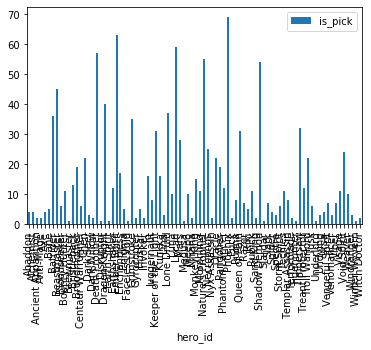

In [22]:
df_bans[['hero_id','is_pick']].groupby('hero_id').count().plot(kind='bar')